# Fanni Kiss & Attila Serfőző - Python Term Project

In [1]:
import pandas as pd
import requests
import json

### Importing the enriched data set from our GitHub repo

- HDRO data: Human Development Report Office Statistical Data API
- CPI data: Transparency International - Corruption Perception Index (CPI)

In [64]:
HDRO_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/HDRO_data.csv')
HDRO_data.head()
for col in HDRO_data.columns:
    print(col)

ISO3
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


In [65]:
CDI_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/CPI_2020.csv')
CDI_data.head()
for col in CDI_data.columns:
    print(col)

Country
ISO3
Region
CPI score 2020
Rank 2020
Sources 2020
Standard error 2020
CPI score 2019
Rank 2019
Sources 2019
Standard error 2019
CPI score 2018
Rank 2018
Sources 2018
Standard error 2018
CPI score 2017
Rank 2017
Sources 2017
Standard error 2017
CPI score 2016
Rank 2016
Sources 2016
Standard error 2016
CPI score 2015
Sources 2015
Standard error 2015
CPI score 2014
Sources 2014
Standard error 2014
CPI Score 2013
Sources 2013
Standard error 2013
CPI Score 2012
Sources 2012
Standard error 2012


Keep only the 2020, 2019 and 2016 CPI data

In [66]:

CDI_data = CDI_data[['Country','ISO3','Region','CPI score 2020','Rank 2020','CPI score 2019','Rank 2019','CPI score 2016','Rank 2016']]

### Merging HDI and CPI dataframes

In [67]:
df1 = pd.merge(CDI_data, HDRO_data, how = 'inner')
for col in df1.columns:
    print(col)

Country
ISO3
Region
CPI score 2020
Rank 2020
CPI score 2019
Rank 2019
CPI score 2016
Rank 2016
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


### EDA

In [ ]:
# Scatterplot about countries

In [ ]:
# Map about countries

## Task 1
In task 1, we would like to explore the relationship between corruption and the Human Development Index. Firstly, we check the correlation between HDI and the CPI score 2020.

In [68]:
df1['CPI score 2019'].corr(df1['HDI_index-2019'])

0.7567983382062069

The correlation between HDI and corruption score in 2020 is 0.76, which indicates that the two attributes of a given country are moving together.

In [69]:
import matplotlib.pyplot as plt

In [70]:
%matplotlib inline

In [71]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [72]:
import seaborn as sns
sns.set(style="ticks")

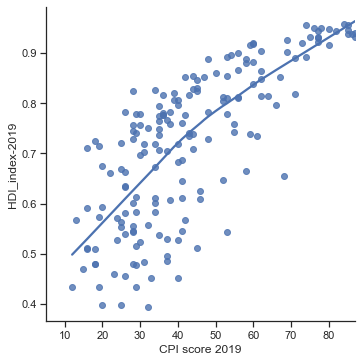

In [73]:
sns.lmplot(x="CPI score 2019", y="HDI_index-2019", data=df1, lowess = True, palette="muted")

If CPI score is increasing (curruption is decreasing), HDI is increasing too. Over a given point (somewhere around CPI=40), the higher corruption score results less higher HDI on average.

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

For further analysis, we check if we have missing values in CPI score or HDI. We do have missing values in HDI so we drop those observations.

In [75]:
df1.isnull().any()

Country                         False
ISO3                            False
Region                          False
CPI score 2020                  False
Rank 2020                       False
CPI score 2019                  False
Rank 2019                       False
CPI score 2016                   True
Rank 2016                        True
Employment_ratio-2016            True
Employment_ratio-2019            True
GDP_per_capita-2016              True
GDP_per_capita-2019              True
HDI_index-2016                   True
HDI_index-2019                   True
Women_in_parliament_(%)-2016     True
Women_in_parliament_(%)-2019     True
dtype: bool

In [76]:
df1 = df1.dropna(subset=['HDI_index-2019','CPI score 2019'])

We set CPI score 2020 as explanatory variable and HDI as dependent variable.

In [77]:
X = df1[["CPI score 2019"]].values
y = df1["HDI_index-2019"].values

Let's see the average value of HDI on the plot below.

D:\Programok\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HDI_index-2019', ylabel='Density'>

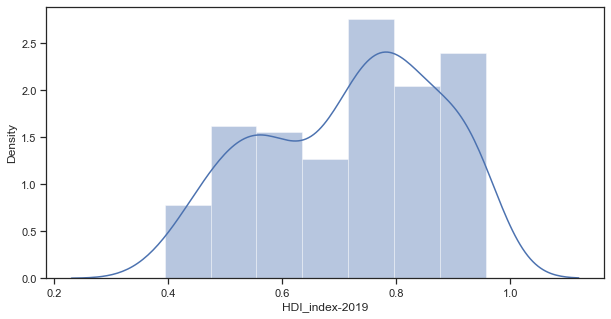

In [78]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df1['HDI_index-2019'])


Next, we split 80% of the data to training set while 20% of the data to test set using below code.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [80]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
regressor.coef_, X

(array([0.00635913]),
 array([[87],
        [87],
        [86],
        [85],
        [85],
        [85],
        [84],
        [82],
        [80],
        [80],
        [77],
        [77],
        [77],
        [76],
        [75],
        [77],
        [78],
        [74],
        [73],
        [74],
        [71],
        [71],
        [69],
        [68],
        [69],
        [67],
        [66],
        [62],
        [64],
        [62],
        [62],
        [62],
        [59],
        [60],
        [60],
        [61],
        [60],
        [60],
        [59],
        [58],
        [56],
        [56],
        [58],
        [58],
        [55],
        [56],
        [55],
        [56],
        [53],
        [52],
        [53],
        [54],
        [52],
        [53],
        [53],
        [52],
        [53],
        [48],
        [50],
        [48],
        [42],
        [47],
        [48],
        [46],
        [45],
        [45],
        [45],
        [44],
        [44],
        [44]

Based on the regression above, we can see that the coefficient is 0.00635913, which means that if the corruption score is increased by 1, the HDI is increased by 0.00635913 on average.

Let's make a prediction based on CPI score 2020 to see, how good predictor corruption is for HDI.

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_pred1 = df_pred.head(25)

df_pred

,Actual,Predicted
0,0.854,0.779118
1,0.539,0.607421
2,0.625,0.734604
3,0.646,0.772759
4,0.557,0.645576
5,0.496,0.677372
6,0.944,0.963533
7,0.594,0.569267
8,0.824,0.620140
9,0.796,0.696449


Based on the metrics below, corruption can be a meaningful predictor of HDI. 

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08539228748237408
Mean Squared Error: 0.010544943682237006
Root Mean Squared Error: 0.10268857620123577


## Task 2

In [100]:
df1['CPI_Rank_difference'] = df1["Rank 2016"]-df1["Rank 2019"]
df1.sort_values(by=['CPI_Rank_difference'], ascending = False)

,Country,ISO3,Region,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2016,Rank 2016,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019,CPI_Rank_difference
101,Gambia,GMB,SSA,37,102,37,96,26.0,145.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345,49.0
60,Armenia,ARM,ECA,49,60,42,77,33.0,113.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485,36.0
80,Argentina,ARG,AME,42,78,45,66,36.0,95.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877,29.0
91,Ecuador,ECU,AME,39,92,38,93,31.0,120.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956,27.0
83,Guyana,GUY,AME,41,83,40,85,34.0,108.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Liberia,LBR,SSA,28,137,28,137,37.0,90.0,74.393,74.167,1516.356,1427.819,0.478,0.480,10.680,11.650,-47.0
26,Seychelles,SYC,SSA,66,27,66,27,NaN,NaN,NaN,NaN,26421.941,29055.749,0.787,0.796,21.212,21.212,NaN
75,Vanuatu,VUT,AP,43,75,46,64,NaN,NaN,66.791,66.811,3066.322,3143.628,0.598,0.609,0.100,0.100,NaN
119,Eswatini,SWZ,SSA,33,117,34,113,NaN,NaN,39.917,40.910,8405.799,8688.101,0.588,0.611,14.737,12.121,NaN


In [ ]:
# Top 5 countries or top 10
# and their ranking movements on a horizontal bar chart


